In [1]:
import dv_processing as dv
from snn_delays.snn_refactored import SNN
from snn_delays.utils.dataset_loader import DatasetLoader
from snn_delays.utils.train_utils_refact_minimal import train, get_device, propagate_batch_simple
from snn_delays.utils.test_behavior import tb_save_max_acc_refac

device = get_device()
dataset = 'davis'
total_time = 50
batch_size = 64
folder_name = 'ABCXO'

# DATASET
DL = DatasetLoader(dataset=dataset,
                  caching='memory',
                  num_workers=0,
                  batch_size=batch_size,
                  total_time=total_time,
                  #sensor_size_to = 45,
                  sensor_size_to = 32,
                  folder_name = folder_name)
train_loader, test_loader, dataset_dict = DL.get_dataloaders()

Running on: cuda:0
[CenterCrop(sensor_size=(240, 180, 2), size=(180, 180)), Downsample(time_factor=1, spatial_factor=0.17777777777777778, sensor_size=None, target_size=None), ToFrame(sensor_size=(32, 32, 2), time_window=None, event_count=None, n_time_bins=50, n_event_bins=None, overlap=0, include_incomplete=False)]


In [2]:
dataset_dict['time_ms'] = 250
dataset_dict

{'num_input': 2048,
 'num_training_samples': 3000,
 'num_output': 5,
 'dataset_name': 'davis',
 'time_ms': 250}

Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
SNN(
  (criterion): MSELoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=2048, out_features=24, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=24, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=24, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000


c:\Users\Alberto\anaconda3\envs\deeplearning\lib\site-packages\torch\optim\lr_scheduler.py:156: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Step [15/46], Loss: 0.16047
Step [30/46], Loss: 0.13407
Step [45/46], Loss: 0.12166
Time elasped: 128.0928795337677
600
Test Loss: 0.11598866879940033
Avg spk_count per neuron for all 50 time-steps 222.91583333333332
Test Accuracy of the model on the test samples: 65.167

saving max acc: 65.16666666666667
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.11554
Step [30/46], Loss: 0.09736
Step [45/46], Loss: 0.08107
Time elasped: 16.330421924591064
600
Test Loss: 0.08473975360393524
Avg spk_count per neuron for all 50 time-steps 238.51916666666668
Test Accuracy of the model on the test samples: 79.667

saving max acc: 79.66666666666667
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo_32_24
Epoch [3/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 0.08236
Step [30/46], Loss: 0.07262
Step [45/46], Loss: 0.06240
T

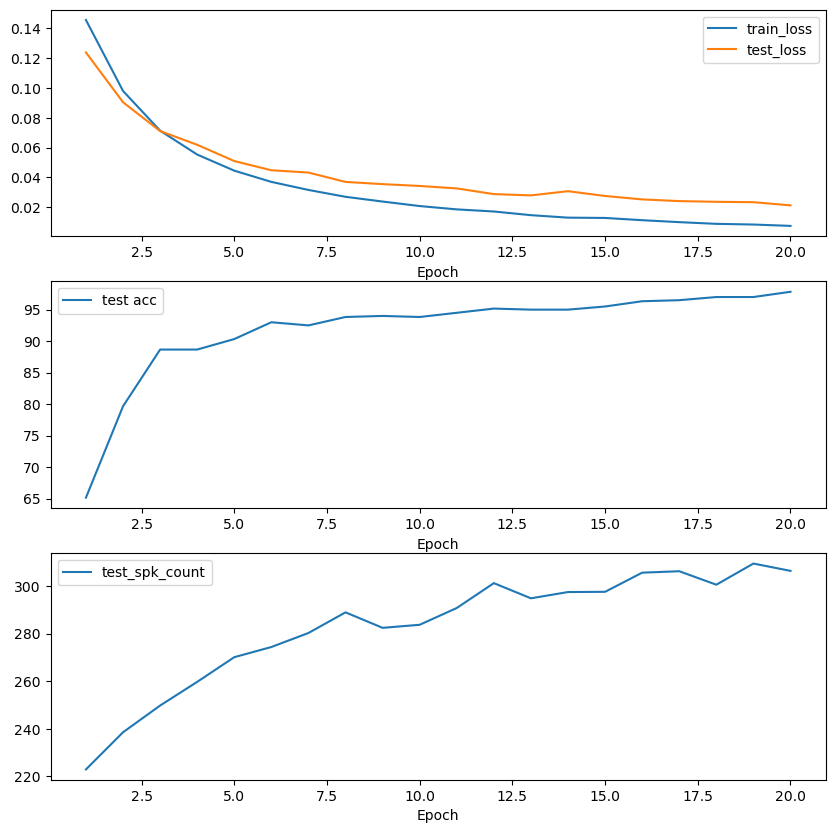

In [3]:
ckpt_dir = 'abcxo_32_24'

#structure = (64, 2, 'f')
structure = (24, 2, 'f')

extra_kwargs = {}

snn = SNN(dataset_dict=dataset_dict, structure=structure, tau_m=100.0, win=total_time, loss_fn='spk_count', batch_size=batch_size, device=device, 
          **extra_kwargs)

snn.input2spike_th = 0.5

snn.model_name = 'abcxo_f'
snn.set_layers()
snn.to(device)
print(snn)

num_epochs = 20
lr = 1e-3
train(snn, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=4050, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 14.83511
Step [30/46], Loss: 9.44305
Step [45/46], Loss: 8.28895
Time elasped: 14.409530878067017
600
Test Loss: 7.985458326339722
Avg spk_count per neuron for all 50 time-steps 1514.5508333333332
Test Accuracy of the model on the test samples: 23.000

saving max acc: 23.0
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 7.24626
Step [30/46], Loss: 5.3

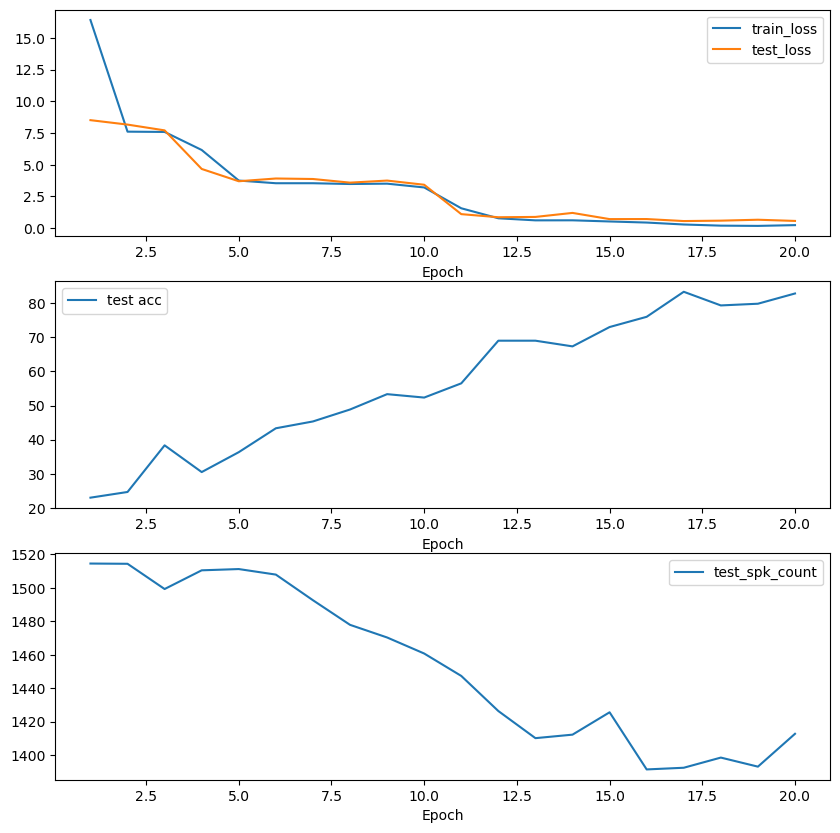

In [16]:
extra_kwargs = {'delay_range':(10, 1),
                'pruned_delays': 1}

snn_rd = SNN(dataset_dict, structure=(64, 2, 'd'), win=total_time, tau_m=100.0,
               loss_fn='mem_sum', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn.input2spike_th = 0.5
snn_rd.model_name = 'abcxo_d'

snn_rd.set_layers()
snn_rd.to(device)

print(snn_rd)
train(snn_rd, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)

Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
Delta t: 5.0 ms
SNN(
  (criterion): CrossEntropyLoss()
  (layers): ModuleList(
    (0): FeedforwardSNNLayer(
      (linear): Linear(in_features=4050, out_features=64, bias=False)
    )
    (1): FeedforwardSNNLayer(
      (linear): Linear(in_features=640, out_features=64, bias=False)
    )
    (2): FeedforwardSNNLayer(
      (linear): Linear(in_features=64, out_features=5, bias=False)
    )
  )
)
Epoch [1/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 18.68459
Step [30/46], Loss: 12.24704
Step [45/46], Loss: 11.59069
Time elasped: 14.620588064193726
600
Test Loss: 7.93427677154541
Avg spk_count per neuron for all 50 time-steps 1150.8541666666667
Test Accuracy of the model on the test samples: 21.667

saving max acc: 21.666666666666668
Model saved in  C:\Users\Alberto\OneDrive - UNIVERSIDAD DE SEVILLA\PythonData\Checkpoints\abcxo
Epoch [2/20], learning_rates 0.001000, 0.100000
Step [15/46], Loss: 7.20291
Step [30

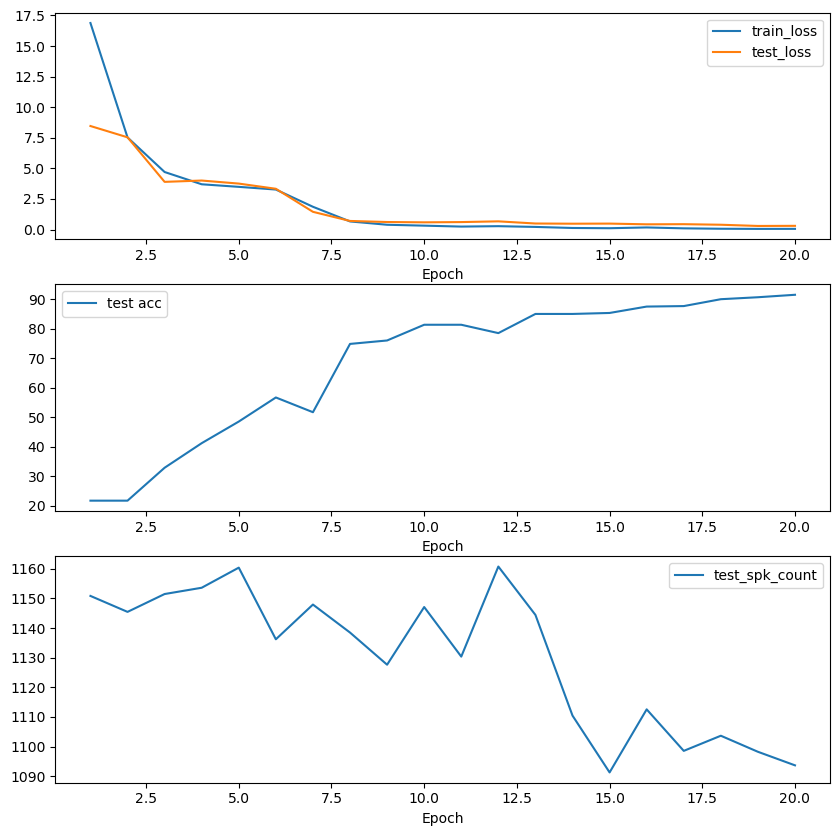

In [17]:
extra_kwargs = {'delay_range':(10, 1),
                'pruned_delays': 3}

snn_rd = SNN(dataset_dict, structure=(64, 2, 'd'), win=total_time, tau_m=100.0,
               loss_fn='mem_sum', batch_size=batch_size, device=device, debug=False, **extra_kwargs)

snn.input2spike_th = 0.5
snn_rd.model_name = 'abcxo_d3'

snn_rd.set_layers()
snn_rd.to(device)

print(snn_rd)
train(snn_rd, train_loader, test_loader, lr, num_epochs, ckpt_dir=ckpt_dir,
       test_behavior=tb_save_max_acc_refac, scheduler=(10, 0.95), test_every=1, freeze_taus=True)